/tmp/ipython-input-3553400908.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)



🎯 Acurácia média (validação cruzada): 0.7889837423890528


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


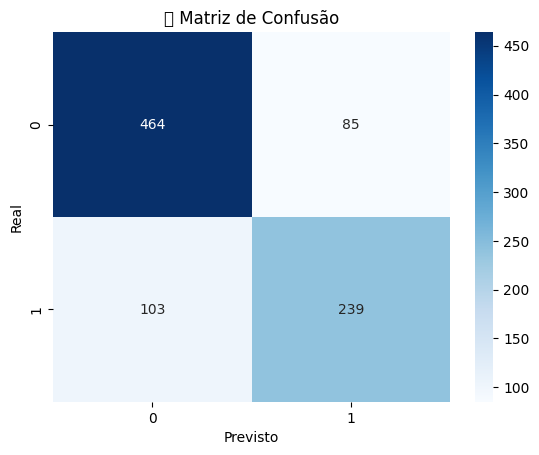


📊 Relatório de Classificação (validação cruzada):

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [ ]:
### 🧪 Kit Prático – Semana 9: Avaliação de Modelos – Validação Cruzada e Métricas
# Tema: Como avaliar a performance de modelos preditivos
# Ferramenta: Google Colab
# Dataset: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Carregar os dados
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Passo 2: Preparar os dados
df_model = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
df_model['Age'].fillna(df_model['Age'].mean(), inplace=True)
df_model['Sex'] = df_model['Sex'].map({'male': 0, 'female': 1})

X = df_model[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_model['Survived']

# Passo 3: Validação cruzada (k-fold = 5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo = LogisticRegression(max_iter=200)

scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')
print("\n🎯 Acurácia média (validação cruzada):", scores.mean())

# Passo 4: Previsões com validação cruzada
y_pred = cross_val_predict(modelo, X, y, cv=kf)

# Passo 5: Matriz de confusão
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('🔍 Matriz de Confusão')
plt.show()

# Passo 6: Relatório de classificação
print("\n📊 Relatório de Classificação (validação cruzada):\n")
print(classification_report(y, y_pred))

# DESAFIO EXTRA:
# Comparar o desempenho com um modelo de árvore de decisão (DecisionTreeClassifier)


In [ ]:
modelo_arvore = DecisionTreeClassifier(random_state=42)

scores_arvore = cross_val_score(modelo_arvore, X, y, cv=kf, scoring='accuracy')
print("\n🎯 Acurácia média (Árvore de Decisão):", scores_arvore.mean())

y_pred_arvore = cross_val_predict(modelo_arvore, X, y, cv=kf)

cm_arvore = confusion_matrix(y, y_pred_arvore)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_arvore, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('🔍 Matriz de Confusão (Árvore de Decisão)')
plt.show()

print("\n📊 Relatório de Classificação (Árvore de Decisão):\n")
print(classification_report(y, y_pred_arvore))